In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [23]:
data=pd.read_csv("./data/data.csv")
data.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


In [9]:
num_rows, num_cols=data.shape
print(f"number of row is {num_rows}")
print(f"Number of Columns is  {num_cols}")

number of row is 95662
Number of Columns is  16


In [3]:
data.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [4]:
data.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,95662.0,9.566200e+04,9.566200e+04,95662.000000,95662.000000
mean,256.0,6.717846e+03,9.900584e+03,2.255974,0.002018
std,0.0,1.233068e+05,1.231221e+05,0.732924,0.044872
min,256.0,-1.000000e+06,2.000000e+00,0.000000,0.000000
25%,256.0,-5.000000e+01,2.750000e+02,2.000000,0.000000
50%,256.0,1.000000e+03,1.000000e+03,2.000000,0.000000
75%,256.0,2.800000e+03,5.000000e+03,2.000000,0.000000
max,256.0,9.880000e+06,9.880000e+06,4.000000,1.000000


In [6]:
data.dtypes

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object

In [25]:

data1 = {
    'values': np.random.normal(loc=50, scale=10, size=1000)  
}

df = pd.DataFrame(data1)


In [12]:
mean = df['values'].mean()
median = df['values'].median()
mode = df['values'].mode()[0]  

print(f'Mean: {mean}')
print(f'Median: {median}')
print(f'Mode: {mode}')


Mean: 50.00733674335334
Median: 49.97486790409379
Mode: 15.41244407218894


In [13]:
std_dev = df['values'].std()
variance = df['values'].var()
range_values = df['values'].max() - df['values'].min()
iqr = stats.iqr(df['values'])  # Interquartile range

print(f'Standard Deviation: {std_dev}')
print(f'Variance: {variance}')
print(f'Range: {range_values}')
print(f'Interquartile Range (IQR): {iqr}')


Standard Deviation: 9.815232709461924
Variance: 96.33879314089127
Range: 64.16515947968625
Interquartile Range (IQR): 13.170287668293383


In [14]:
skewness = df['values'].skew()
kurtosis = df['values'].kurtosis()

print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')


Skewness: -0.0697414548372097
Kurtosis: 0.03551256202145625


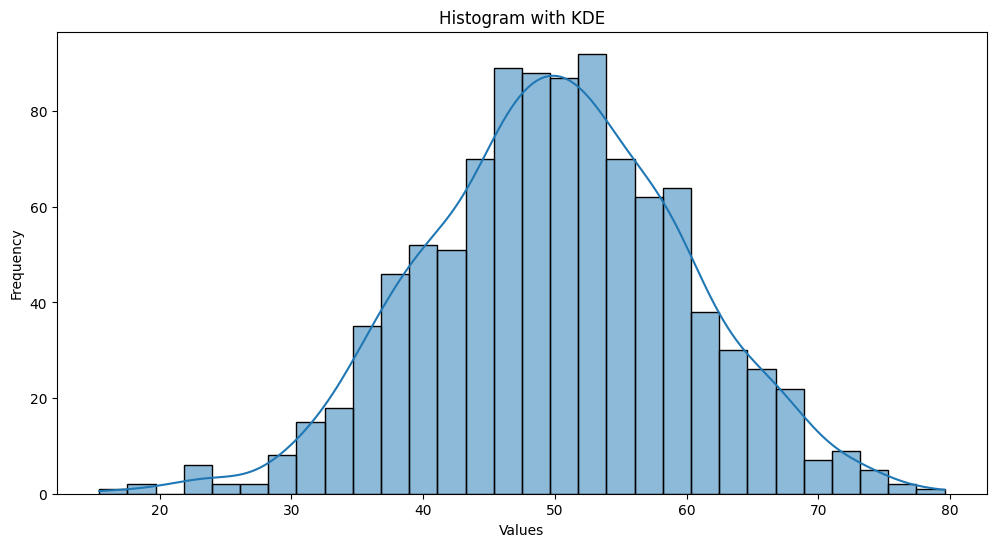

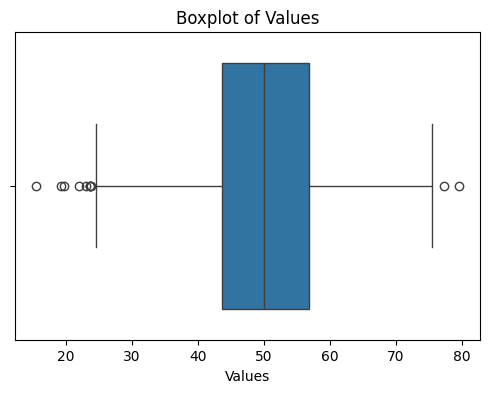

In [15]:
# Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['values'], bins=30, kde=True)
plt.title('Histogram with KDE')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['values'])
plt.title('Boxplot of Values')
plt.xlabel('Values')
plt.show()


In [32]:
def identify_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Example usage
for col in numerical_cols:
    outliers = identify_outliers_iqr(data,col)
    print("Outliers based on IQR method:\n", outliers)

Outliers based on IQR method:
 Empty DataFrame
Columns: [TransactionId, BatchId, AccountId, SubscriptionId, CustomerId, CurrencyCode, CountryCode, ProviderId, ProductId, ProductCategory, ChannelId, Amount, Value, TransactionStartTime, PricingStrategy, FraudResult]
Index: []
Outliers based on IQR method:
               TransactionId         BatchId       AccountId  \
3         TransactionId_380  BatchId_102363   AccountId_648   
6      TransactionId_118063  BatchId_118460  AccountId_2442   
32       TransactionId_5351  BatchId_110904  AccountId_2540   
39     TransactionId_104700   BatchId_55274  AccountId_2126   
40      TransactionId_13858   BatchId_86043  AccountId_2126   
...                     ...             ...             ...   
95633   TransactionId_66516   BatchId_98969  AccountId_3014   
95638   TransactionId_20690   BatchId_18591  AccountId_1232   
95640  TransactionId_131580   BatchId_16209  AccountId_1219   
95643  TransactionId_114220   BatchId_89378  AccountId_1318   
9

In [24]:
num_cols = ["int64", "float64"]
numerical_cols = []

for col in data.columns:
    if data[col].dtype.name in num_cols:  # Access the dtype of the column correctly
        numerical_cols.append(col)

print("Numerical columns:", numerical_cols)


Numerical columns: ['CountryCode', 'Amount', 'Value', 'PricingStrategy', 'FraudResult']


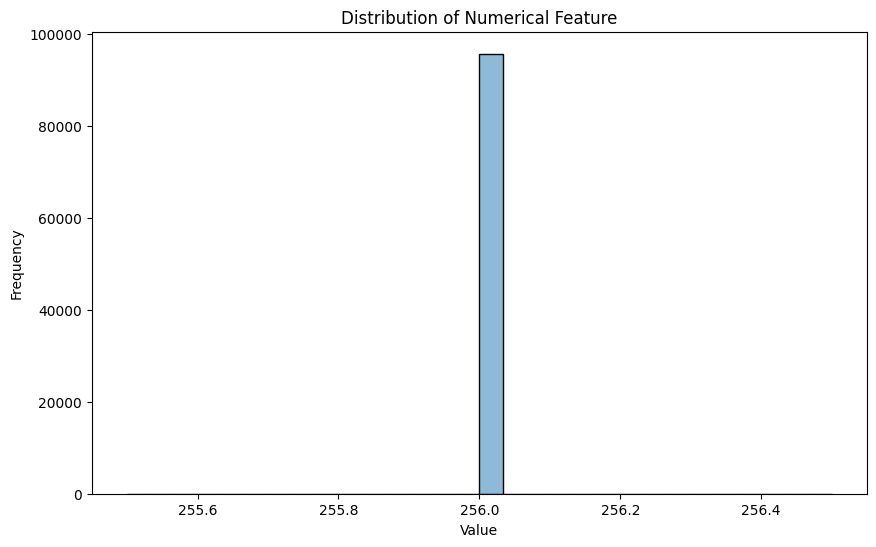

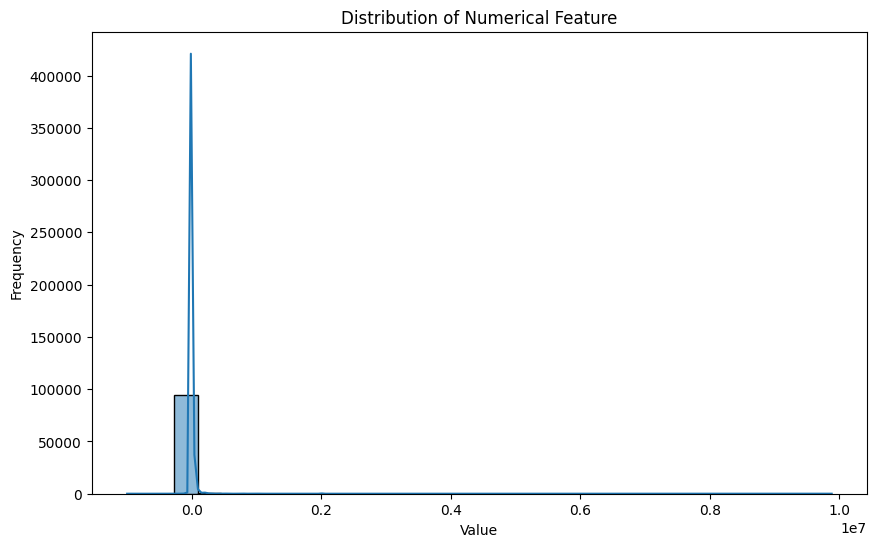

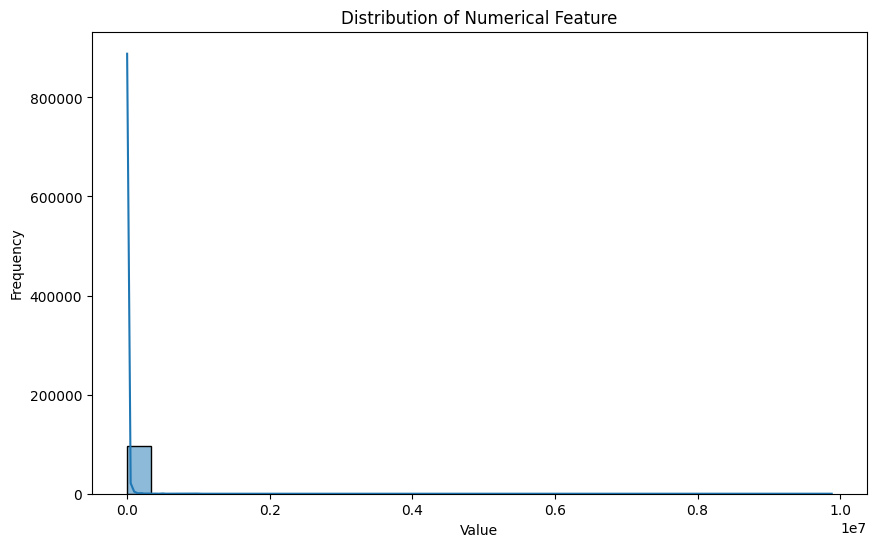

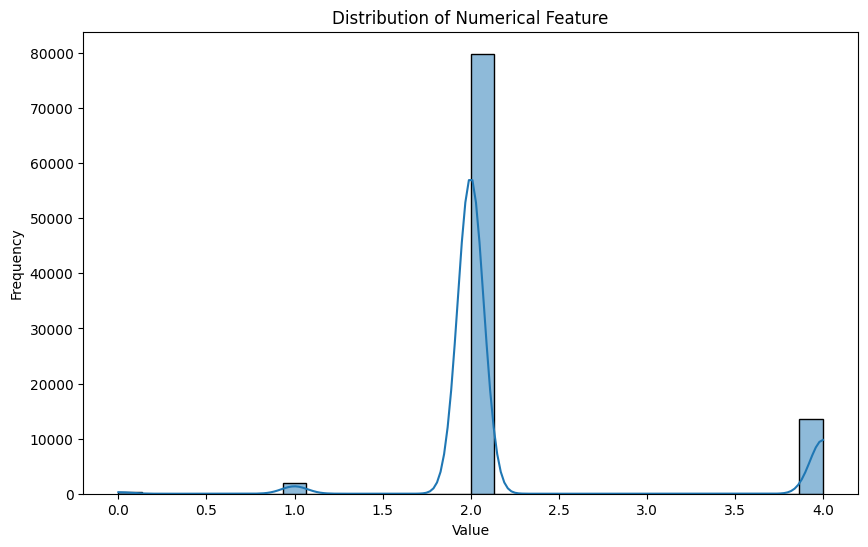

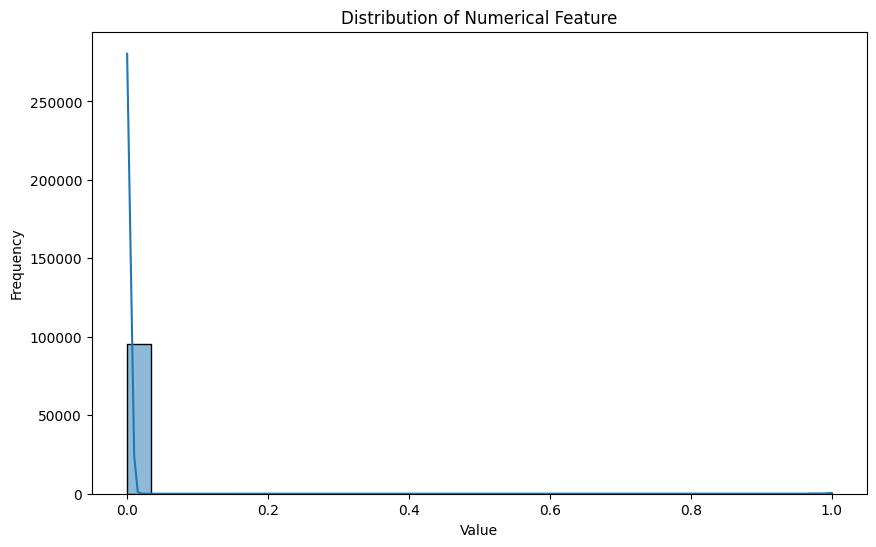

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title('Distribution of Numerical Feature')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()





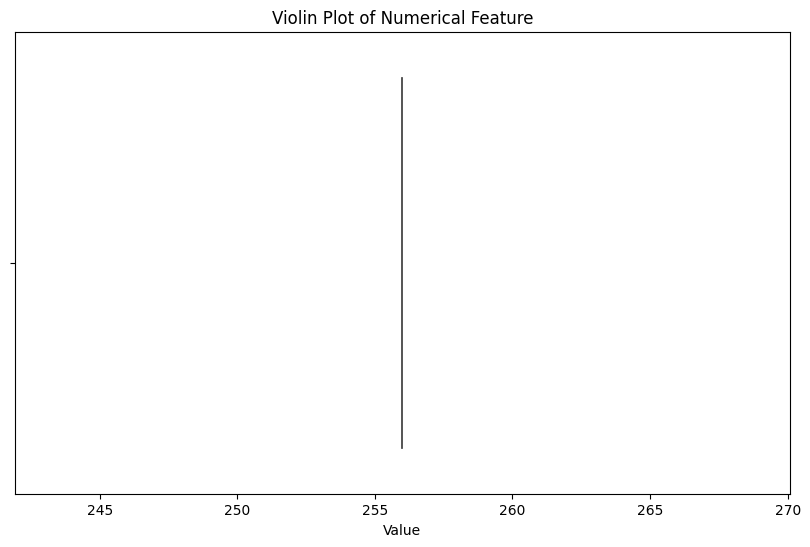

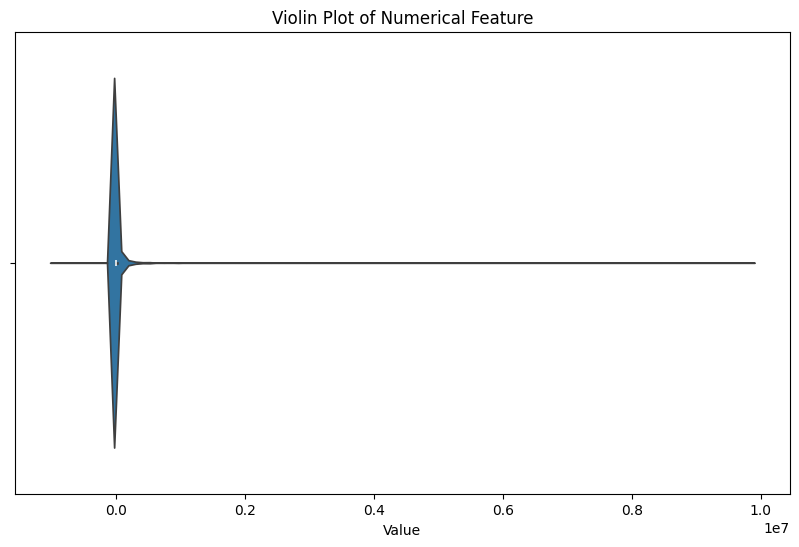

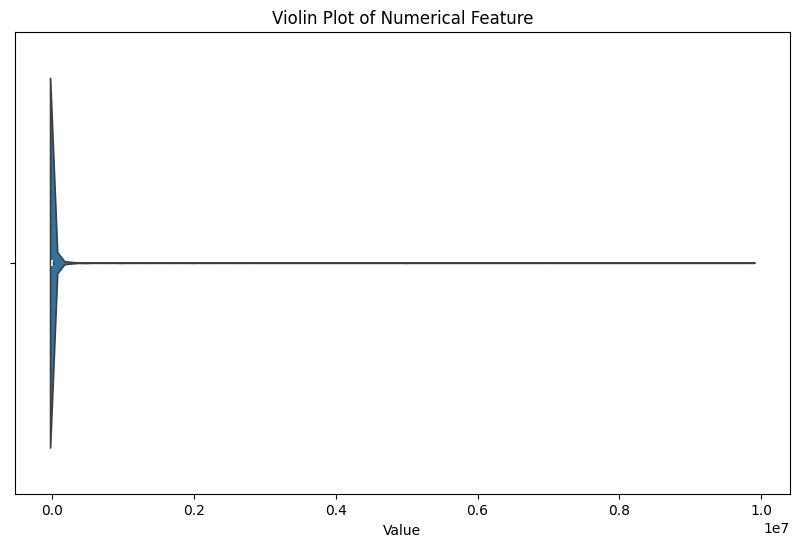

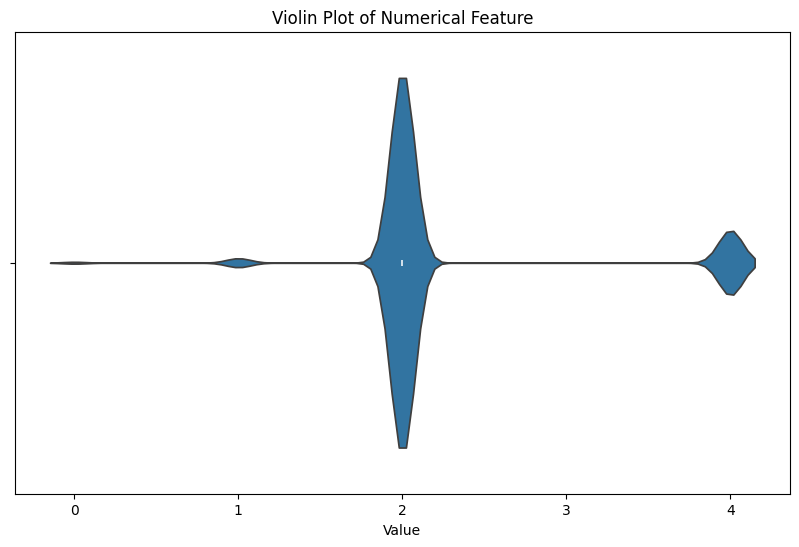

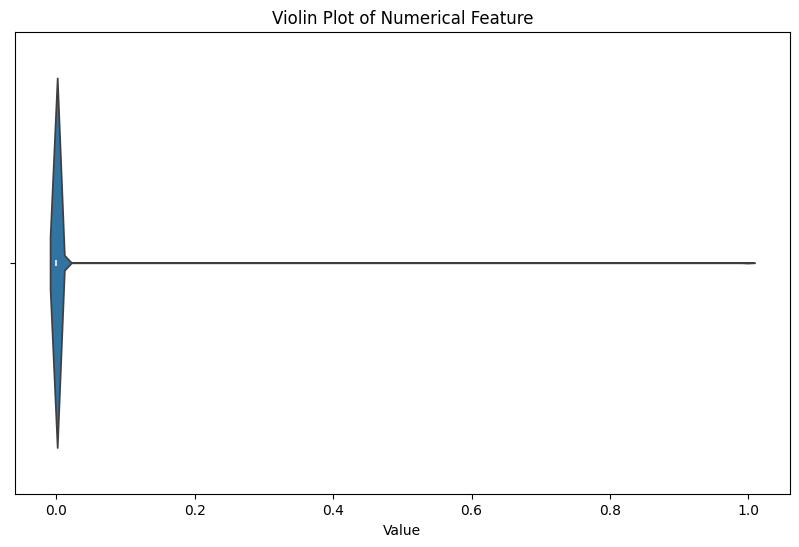

In [29]:
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=data[col])
    plt.title('Violin Plot of Numerical Feature')
    plt.xlabel('Value')
    plt.show()


In [33]:
skewness = data[numerical_cols].skew()
print("Skewness of numerical columns:\n", skewness)

Skewness of numerical columns:
 CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64


In [37]:
Cate_cols = ["object"]
Category_cols = []

for col in data.columns:
    if data[col].dtype.name in Cate_cols:  
        Category_cols.append(col)

print("Caregory columns:",Category_cols)


Caregory columns: ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime']


In [39]:
for col in Category_cols:
    category_percentage = data[col].value_counts(normalize=True) * 100
    print(category_percentage)



TransactionId
TransactionId_76871     0.001045
TransactionId_74922     0.001045
TransactionId_2737      0.001045
TransactionId_28101     0.001045
TransactionId_33267     0.001045
                          ...   
TransactionId_32860     0.001045
TransactionId_139405    0.001045
TransactionId_65784     0.001045
TransactionId_8889      0.001045
TransactionId_35670     0.001045
Name: proportion, Length: 95662, dtype: float64
BatchId
BatchId_67019     0.029270
BatchId_51870     0.016726
BatchId_113893    0.014635
BatchId_127204    0.012544
BatchId_116835    0.010453
                    ...   
BatchId_23939     0.001045
BatchId_104215    0.001045
BatchId_116411    0.001045
BatchId_36631     0.001045
BatchId_29317     0.001045
Name: proportion, Length: 94809, dtype: float64
AccountId
AccountId_4841    32.293910
AccountId_4249     4.659112
AccountId_4840     1.816813
AccountId_3206     1.155109
AccountId_318      1.118521
                    ...    
AccountId_4180     0.001045
AccountId_63    

In [40]:
for col in Category_cols:
    category_counts = data[col].value_counts()
    category_counts.plot(kind='bar')
    plt.title('Category Distribution')
    plt.xlabel('Category')
    plt.ylabel('Count')
    plt.show()

TransactionId            object
BatchId                  object
AccountId                object
SubscriptionId           object
CustomerId               object
CurrencyCode             object
CountryCode               int64
ProviderId               object
ProductId                object
ProductCategory          object
ChannelId                object
Amount                  float64
Value                     int64
TransactionStartTime     object
PricingStrategy           int64
FraudResult               int64
dtype: object